In [1]:
!pip install vizdoom

In [2]:
!cd github & git clone https://github.com/mwydmuch/ViZDoom

The system cannot find the path specified.
Cloning into 'ViZDoom'...
Updating files:  85% (1767/2057)
Updating files:  86% (1770/2057)
Updating files:  87% (1790/2057)
Updating files:  88% (1811/2057)
Updating files:  89% (1831/2057)
Updating files:  90% (1852/2057)
Updating files:  91% (1872/2057)
Updating files:  92% (1893/2057)
Updating files:  93% (1914/2057)
Updating files:  94% (1934/2057)
Updating files:  95% (1955/2057)
Updating files:  96% (1975/2057)
Updating files:  97% (1996/2057)
Updating files:  98% (2016/2057)
Updating files:  99% (2037/2057)
Updating files: 100% (2057/2057)
Updating files: 100% (2057/2057), done.


In [16]:
# Import vizdoom for game env
from vizdoom import * 
# Import random for action sampling
import random
# Import time for sleeping
import time 
# Import numpy for identity matrix
import numpy as np
import torch

In [17]:
print(torch.cuda.is_available())           # Should print True
print(torch.cuda.get_device_name(0))

True
NVIDIA GeForce RTX 2050


In [18]:
game = DoomGame()
game.load_config('VizDoom/scenarios/basic.cfg')
game.init()

In [4]:
actions = np.identity(3, dtype=np.uint8)

In [5]:
state = game.get_state()
state.game_variables

array([50.])

In [6]:
# Loop through episodes 
episodes = 10 
for episode in range(episodes): 
    # Create a new episode or game 
    game.new_episode()
    # Check the game isn't done 
    while not game.is_episode_finished(): 
        # Get the game state 
        state = game.get_state()
        # Get the game image 
        img = state.screen_buffer
        # Get the game variables - ammo
        info = state.game_variables
        # Take an action
        reward = game.make_action(random.choice(actions),4)
        # Print rewward 
        print('reward:', reward) 
        time.sleep(0.02)
    print('Result:', game.get_total_reward())
    time.sleep(2)

reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: 99.0
Result: -128.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4

In [24]:
game.close()

In [9]:
# 2. Converting it to a Gym Environment

In [11]:
!pip install gym
!pip install gymnasium
!pip install --upgrade stable-baselines3 gymnasium

import gymnasium as gym
from gymnasium import spaces
# Import environment base class from OpenAI Gym
from gym import Env
# Import gym spaces 
from gym.spaces import Discrete, Box
# Import opencv 
import cv2

In [11]:
game.get_state().screen_buffer.shape

(3, 240, 320)

In [12]:
class VizDoomGym(gym.Env): 
    def __init__(self, render=False): 
        super().__init__()
        
        self.game = DoomGame()
        self.game.load_config('VizDoom/scenarios/basic.cfg')
        
        self.game.set_window_visible(render)
        self.game.init()
        
        # Correct usage of gymnasium.spaces
        self.observation_space = spaces.Box(low=0, high=255, shape=(100,160,1), dtype=np.uint8)
        self.action_space = spaces.Discrete(3)
        
    def step(self, action):
        actions = np.identity(3, dtype=np.uint8)
        reward = self.game.make_action(actions[action], 4)
        
        if self.game.get_state(): 
            state = self.game.get_state().screen_buffer
            state = self.grayscale(state)
            ammo = self.game.get_state().game_variables[0]
            info = {"info": ammo}
        else: 
            state = np.zeros(self.observation_space.shape, dtype=np.uint8)
            info = {"info": 0}
        
        done = self.game.is_episode_finished()
        truncated = False  # Required by gymnasium step API

        return state, reward, done, truncated, info  # Return 5 values

    def reset(self, seed=None, options=None): 
        super().reset(seed=seed)

        if not self.game.is_running():
         self.game.init()
        
        self.game.new_episode()
        state = self.game.get_state().screen_buffer
        return self.grayscale(state), {}  # Return obs and info

    def render(self):
        pass
    
    def grayscale(self, observation):
        gray = cv2.cvtColor(np.moveaxis(observation, 0, -1), cv2.COLOR_BGR2GRAY)
        resize = cv2.resize(gray, (160, 100), interpolation=cv2.INTER_CUBIC)
        return np.reshape(resize, (100,160,1))
    
    def close(self): 
        self.game.close()

In [21]:
env = VizDoomGym(render=True)

In [14]:
 state,_ = env.reset()

In [15]:
# env.reset()
env.close()
# Import Environment checker
from stable_baselines3.common import env_checker
env_checker.check_env(env)

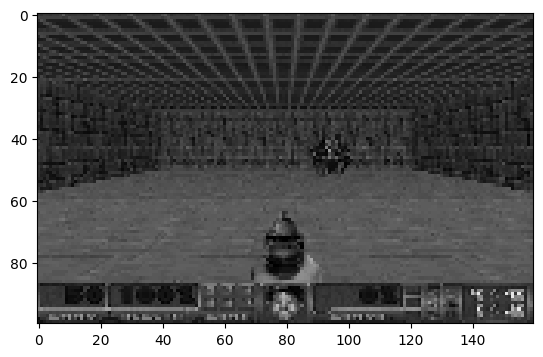

In [16]:
!pip install matplotlib
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(state, cv2.COLOR_BGR2RGB))

In [54]:
!pip install stable-baselines3[extra]

In [17]:
import os 
# Import callback class from sb3
from stable_baselines3.common.callbacks import BaseCallback

In [18]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [19]:
CHECKPOINT_DIR = './train/train_basic'
LOG_DIR = './logs/log_basic'

In [20]:
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

In [21]:
# import ppo for training
from stable_baselines3 import PPO
# Non rendered environment
env = VizDoomGym()
model = PPO('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=1, learning_rate=0.0001, n_steps=2048,device='cuda')
model.learn(total_timesteps=100000, callback=callback)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
Logging to ./logs/log_basic\PPO_2
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 33       |
|    ep_rew_mean     | -83.8    |
| time/              |          |
|    fps             | 25       |
|    iterations      | 1        |
|    time_elapsed    | 79       |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 34           |
|    ep_rew_mean          | -92.4        |
| time/                   |              |
|    fps                  | 17           |
|    iterations           | 2            |
|    time_elapsed         | 229          |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0062754317 |
|    clip_fractio

In [7]:
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy

In [8]:
model = PPO.load('./train/train_basic/best_model_60000')

In [19]:
env = VizDoomGym(render=True)
# Evaluate mean reward for 10 games
mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=100)

C:\Users\Aritra Kolay\AppData\Local\Programs\Python\Python310\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


In [27]:
mean_reward
_,obs=env.reset()


AssertionError: The observation provided is a dict but the obs space is Box(0, 255, (1, 100, 160), uint8)

In [30]:
for episode in range(100): 
    obs, _ = env.reset()  # use just obs = env.reset() if Gym < 0.26
    done = False
    total_reward = 0

    while not done: 
        action, _ = model.predict(obs)
        obs, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        total_reward += reward

    print('Total Reward for episode {} is {}'.format(episode, total_reward))
    time.sleep(2)

Total Reward for episode 0 is 95.0
Total Reward for episode 1 is 67.0
Total Reward for episode 2 is 95.0
Total Reward for episode 3 is 67.0
Total Reward for episode 4 is 95.0
Total Reward for episode 5 is 60.0
Total Reward for episode 6 is 95.0
Total Reward for episode 7 is 95.0
Total Reward for episode 8 is 95.0
Total Reward for episode 9 is 67.0
Total Reward for episode 10 is 95.0
Total Reward for episode 11 is 95.0
Total Reward for episode 12 is 95.0
Total Reward for episode 13 is 83.0
Total Reward for episode 14 is 95.0
Total Reward for episode 15 is 79.0
Total Reward for episode 16 is 83.0
Total Reward for episode 17 is 95.0
Total Reward for episode 18 is 95.0
Total Reward for episode 19 is 95.0
Total Reward for episode 20 is 95.0
Total Reward for episode 21 is 95.0
Total Reward for episode 22 is 59.0
Total Reward for episode 23 is 79.0
Total Reward for episode 24 is 95.0
Total Reward for episode 25 is 95.0
Total Reward for episode 26 is 95.0
Total Reward for episode 27 is 95.0
To